In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imutils

width=1600, height=1200, depth=3


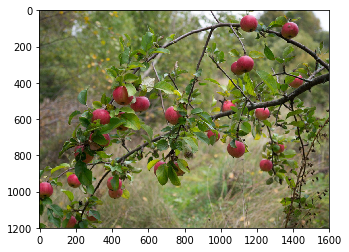

In [2]:
bgr_img = cv2.imread("appletree.jpg")
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
(h, w, d) = image.shape
print("width={}, height={}, depth={}".format(w, h, d))
plt.imshow(image)

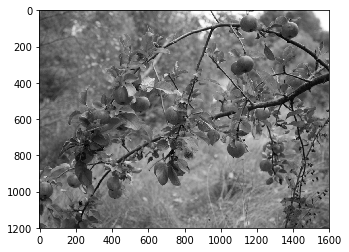

In [3]:
gray = cv2.cvtColor(image.copy(), cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray')

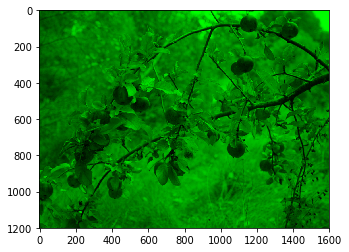

In [4]:
titles=['r','g','b']
plt.figure(figsize = (16,4))
for i in range(2):
    channel = np.zeros_like(image)
    channel[:,:,i] = image[:,:,i]
img_g = channel
plt.imshow(img_g)

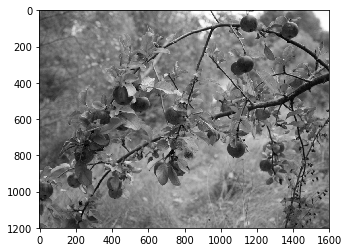

In [5]:
gray = cv2.cvtColor(img_g, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray')

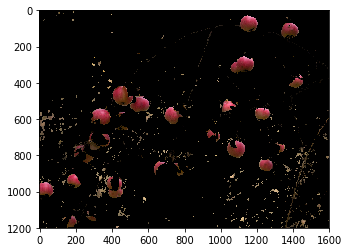

In [6]:
hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
kernel = np.ones((19,19),np.uint8)  #

lowerBound = np.array([100,80,0])
upperBound = np.array([180,255,255])
#lowerBound = np.array([100,80,0])
#upperBound = np.array([255,255,255])
mask = cv2.inRange(hsv,lowerBound,upperBound);
image_result = cv2.bitwise_and(image,image,mask=mask)
plt.imshow(image_result)
#img = cv2.morphologyEx(image_result,cv2.MORPH_OPEN,kernel)
#plt.imshow(img,cmap='gray')
#img.dtype

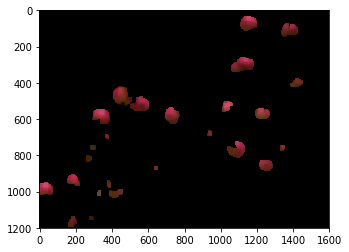

In [7]:
kernel = np.ones((19,19),np.uint8)
opening = cv2.morphologyEx(image_result, cv2.MORPH_OPEN, kernel)
plt.imshow(opening)

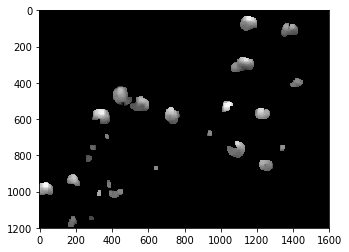

In [8]:
gray = cv2.cvtColor(opening, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray')

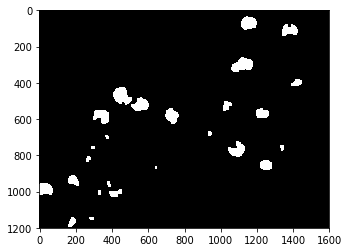

In [9]:
threshold = 10
threshold_value = 255

thresh = cv2.threshold(gray, threshold, threshold_value, cv2.THRESH_BINARY)[1]
plt.imshow(thresh, cmap='gray')

mask = thresh.copy()
mask = cv2.erode(mask, None, iterations = 3)
plt.imshow(mask, cmap = 'gray')

25


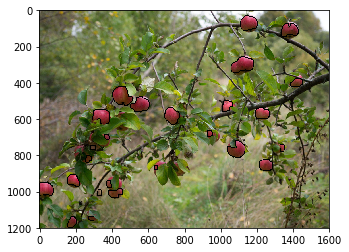

In [10]:
#A)segment the apples
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()
for c in cnts:
    # draw each contour on the output image with a 3px thick black outline
    cv2.drawContours(output, [c], -1, (0, 0, 0), 3)
    
plt.imshow(output)
print(len(cnts))

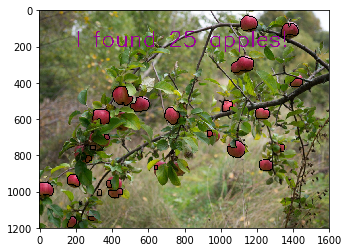

In [11]:
#B)count how many
with_text=output.copy()
text = "I found {} apples!".format(len(cnts))
cv2.putText(with_text, text, (200, 200),  cv2.FONT_HERSHEY_SIMPLEX, 4, (155, 0, 155), 5)
plt.imshow(with_text)

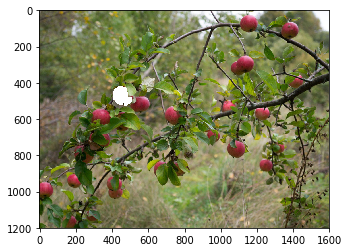

In [12]:
#C)change color of one of them
color_change=image.copy()
cv2.drawContours(color_change, cnts, 20, (255, 255, 255), cv2.FILLED)
plt.imshow(color_change)

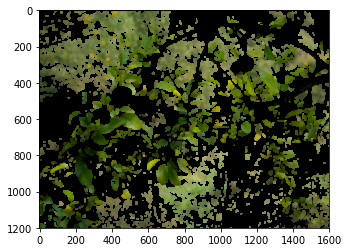

In [20]:
#D)segment the leaves
hsv_leaf = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

lowerBound = np.array([35,80,0])
upperBound = np.array([99,255,255])
#lowerBound = np.array([100,80,0])
#upperBound = np.array([255,255,255])
mask_leaf = cv2.inRange(hsv_leaf,lowerBound,upperBound);
leaf_result = cv2.bitwise_and(image,image,mask=mask_leaf)
plt.imshow(leaf_result)

kernel = np.ones((9,9),np.uint8)
opening_leaf = cv2.morphologyEx(leaf_result, cv2.MORPH_OPEN, kernel)
plt.imshow(opening_leaf)

291


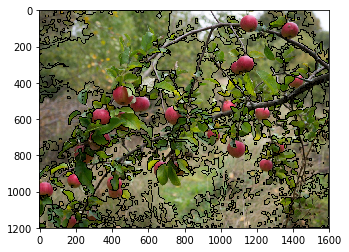

In [21]:
leaf_gray =cv2.cvtColor(opening_leaf, cv2.COLOR_RGB2GRAY)
cnts_leaf = cv2.findContours(leaf_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts_leaf = imutils.grab_contours(cnts_leaf)
output = image.copy()
for c in cnts_leaf:
    # draw each contour on the output image with a 3px thick black outline
    cv2.drawContours(output, [c], -1, (0, 0, 0), 3)
    
plt.imshow(output)
print(len(cnts_leaf))
